C:\Users\HARISH\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


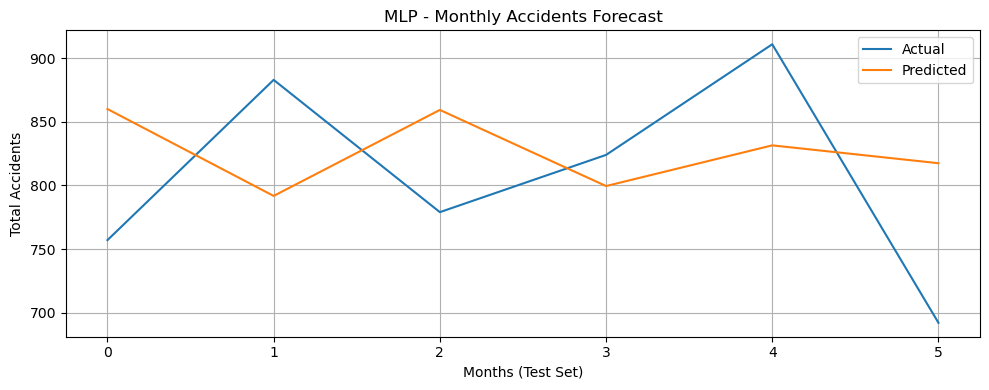

✅ Mean Squared Error: 8012.13


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 1. Load dataset
file_path = r"C:\Users\HARISH\Desktop\notes\time series and analysis pratical\ex 6\accident_time_series_1000_rows.csv"
df = pd.read_csv(file_path)

# 2. Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 3. Resample to monthly accident counts
monthly_accidents = df['Total Accidents'].resample('ME').sum()  # 'ME' avoids the warning

# 4. Normalize data
scaler = MinMaxScaler()
accidents_scaled = scaler.fit_transform(monthly_accidents.values.reshape(-1, 1))

# 5. Create dataset with look-back
def create_dataset(series, look_back=6):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i + look_back].flatten())  # Ensure 2D input
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

look_back = 6
X, y = create_dataset(accidents_scaled, look_back)

# 6. Train/test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 7. MLP model
model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Inverse transform to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Plot
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('MLP - Monthly Accidents Forecast')
plt.xlabel('Months (Test Set)')
plt.ylabel('Total Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"✅ Mean Squared Error: {mse:.2f}")
